# Dataset

0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

# How to Read Files From Google Drive without uploading to Colab

The shortcut of the 'shared' spectrograms was created on "My Drive" in the following way:

1. Click the official link: https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing
2. Go to '**Shared With Me**' folder in your Google Drive
Find the '**spectrograms**' folder that's shared by Global AI Hub.
3. Right-Click on the shared 'spectrograms' folder and select "**Add Shortcut to Drive**"
4. You can then **mount** your Google Drive to Colab and use the folder

In [2]:
# Imports
import os
import cv2
from google.colab.patches import cv2_imshow #cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split

# Test Image GrayScale Transformation

In [3]:
def GetClassName(id):
  ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  classes = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music" ]
  d = dict(zip(ids, classes))
  return d[id]

name = GetClassName(5)
print(name)

engine_idling


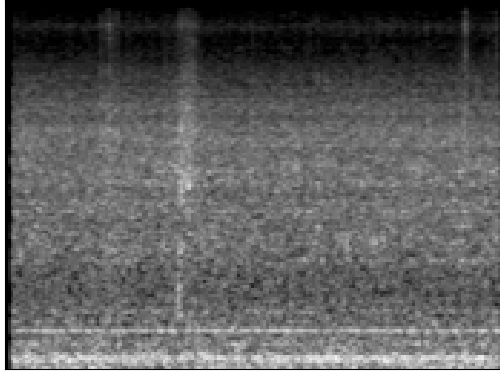

In [4]:
img = cv2.imread("drive/MyDrive/spectrograms/0/100852-0-0-0.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# Test Image Resizing

In [5]:
def ResizeImage(img, percentScale):
  width = int(img.shape[1] * percentScale / 100)
  height = int(img.shape[0] * percentScale / 100)
  dim = (width, height)
  
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

def ResizeImageSquare(img, size):
  return cv2.resize(img, (size, size), interpolation=cv2.INTER_AREA)

Original Dimensions :  (374, 500)
Resized Dimensions :  (128, 128)


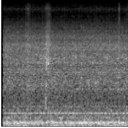

In [6]:
# resize image
imageSize = 128

resized = ResizeImageSquare(gray_img, imageSize)

print('Original Dimensions : ', gray_img.shape)
print('Resized Dimensions : ', resized.shape)
cv2_imshow(resized)

# Test Normalization

In [7]:
def NormalizeImage(img):
  return img/255;

Before normalization


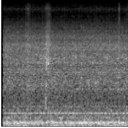

[[255  67   0 ...   0   0   0]
 [255  68   0 ...   0   0   0]
 [255  68   0 ...   0   0   1]
 ...
 [255  68  54 ... 177 170 140]
 [255 131 104 ... 137 134 124]
 [255 255 255 ... 255 255 255]]
After normalization


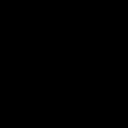

[[1.         0.2627451  0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.00392157]
 ...
 [1.         0.26666667 0.21176471 ... 0.69411765 0.66666667 0.54901961]
 [1.         0.51372549 0.40784314 ... 0.5372549  0.5254902  0.48627451]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [8]:
normalizedImg = NormalizeImage(resized)
print("Before normalization")
cv2_imshow(resized)
print(resized)
print("After normalization")
cv2_imshow(normalizedImg)
print(normalizedImg)

# Loop the folder structure and Read/Resize/Convert/Normalize Images


In [9]:
X_Data = []
Y_Data = []
spectrogramsFolder = "drive/MyDrive/spectrograms"

tic = time.perf_counter()

for sf in os.listdir(spectrogramsFolder):

    subFolder = os.path.join(spectrogramsFolder, sf)

    for file in os.listdir(subFolder):

      filePath = os.path.join(subFolder, file)
      
      # convert the folder name to integer and add to Y_Data list
      Y_Data.append(int(sf))

      if os.path.isfile(filePath):
        
        #Read the image
        img_i = cv2.imread(filePath)

        #Convert to grayscale
        gray_i = cv2.cvtColor(img_i, cv2.COLOR_BGR2GRAY)

        #resize by preserving the aspect ratio
        resized_i = ResizeImageSquare(gray_i, imageSize)

        #normalize image
        normalized_i = NormalizeImage(resized_i)

        # Add the normalized image to X_Data List
        X_Data.append(normalized_i)

toc = time.perf_counter()
print(f"{len(Y_Data)} Images processed in {toc - tic:0.4f} seconds")

8732 Images processed in 179.3032 seconds


# Prepare the Train, Test, and Validation Data

In [10]:
def MapToClassNameList(lst):
  new_list = []
  for item in lst:
    new_list.append(GetClassName(item) + " (" + str(item) + ")")
  return new_list

In [11]:
X_Train, X_Temp, Y_Train, Y_Temp = train_test_split(X_Data, Y_Data, train_size = 0.8)
X_Val, X_Test, Y_Val, Y_Test = train_test_split(X_Temp, Y_Temp, train_size = 0.5)

mapped = MapToClassNameList(Y_Train)
df_Y_Train = pd.DataFrame(mapped)
print("***********************************************")
print(f"Total number of training data: {df_Y_Train[0].count()}")
print("Number of spectrograms in each category:")
print(df_Y_Train[0].value_counts())

mapped = MapToClassNameList(Y_Val)
df_Y_Val = pd.DataFrame(mapped)
print(" ")
print("***********************************************")
print(f"Total number of Validation data: {df_Y_Val[0].count()}")
print("Number of spectrograms in each category:")
print(df_Y_Val[0].value_counts())

mapped = MapToClassNameList(Y_Test)
df_Y_Test = pd.DataFrame(mapped)
print(" ")
print("***********************************************")
print(f"Total number of Test data: {df_Y_Test[0].count()}")
print("Number of spectrograms in each category:")
print(df_Y_Test[0].value_counts())

***********************************************
Total number of training data: 6985
Number of spectrograms in each category:
jackhammer (7)          814
children_playing (2)    810
drilling (4)            807
street_music (9)        797
air_conditioner (0)     793
dog_bark (3)            789
engine_idling (5)       788
siren (8)               741
car_horn (1)            345
gun_shot (6)            301
Name: 0, dtype: int64
 
***********************************************
Total number of Validation data: 873
Number of spectrograms in each category:
air_conditioner (0)     107
dog_bark (3)            106
drilling (4)            105
jackhammer (7)          103
siren (8)                97
street_music (9)         96
engine_idling (5)        96
children_playing (2)     88
car_horn (1)             39
gun_shot (6)             36
Name: 0, dtype: int64
 
***********************************************
Total number of Test data: 874
Number of spectrograms in each category:
engine_idling (5)    

In [12]:
idx = 4533
print(f"The Training Data idx={idx} is classified as {GetClassName(Y_Train[idx])}")
print("The data is *****")
print(X_Train[idx])
print(X_Train[idx].shape)

The Training Data idx=4533 is classified as engine_idling
The data is *****
[[1.         0.2627451  0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.39215686 0.39215686 ... 0.25882353 0.34509804 0.41176471]
 [1.         0.53333333 0.43137255 ... 0.39607843 0.42745098 0.44313725]
 [1.         1.         1.         ... 1.         1.         1.        ]]
(128, 128)


# Construct the Neural Network

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential()

#Feature Extraction Layers
model.add(tf.keras.layers.Conv2D(imageSize, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=(imageSize, imageSize, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(imageSize, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=(imageSize, imageSize, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(imageSize, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=(imageSize, imageSize, 1)))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(imageSize, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(imageSize, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the Model

In [15]:
# Train the model for 100 epochs with batch size of 128
results = model.fit(np.array(X_Train), np.array(Y_Train), batch_size=128, epochs=50, validation_data=(np.array(X_Val), np.array(Y_Val)))

Epoch 1/50
55/55 [==============================] - 6s 116ms/step - loss: 1.8565 - accuracy: 0.3344 - val_loss: 1.1549 - val_accuracy: 0.6231
Epoch 2/50
55/55 [==============================] - 5s 99ms/step - loss: 1.2945 - accuracy: 0.5520 - val_loss: 0.8358 - val_accuracy: 0.7365
Epoch 3/50
55/55 [==============================] - 5s 99ms/step - loss: 1.0116 - accuracy: 0.6560 - val_loss: 0.6940 - val_accuracy: 0.7961
Epoch 4/50
55/55 [==============================] - 5s 99ms/step - loss: 0.8174 - accuracy: 0.7298 - val_loss: 0.6943 - val_accuracy: 0.7789
Epoch 5/50
55/55 [==============================] - 5s 99ms/step - loss: 0.6509 - accuracy: 0.7880 - val_loss: 0.5518 - val_accuracy: 0.8225
Epoch 6/50
55/55 [==============================] - 5s 99ms/step - loss: 0.5264 - accuracy: 0.8281 - val_loss: 0.4641 - val_accuracy: 0.8557
Epoch 7/50
55/55 [==============================] - 5s 99ms/step - loss: 0.4424 - accuracy: 0.8610 - val_loss: 0.4287 - val_accuracy: 0.8694
Epoch 8/50
5

# Visualize the Results

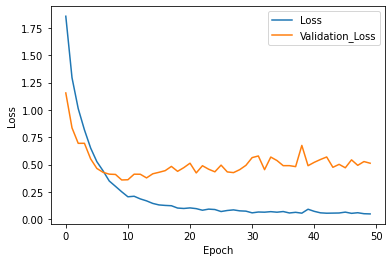

In [16]:
import matplotlib.pyplot as plt

# Plot the the training loss
plt.plot(results.history["loss"], label="Loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Validation_Loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

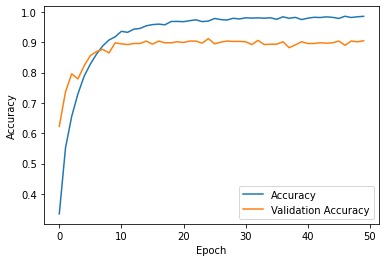

In [17]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="Accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="Validation Accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

# Performance Evaluation

In [19]:
# Evaluate the performance
model.evaluate(np.array(X_Test), np.array(Y_Test))

28/28 [==============================] - 1s 14ms/step - loss: 0.6666 - accuracy: 0.8993


[0.6666243672370911, 0.8993135094642639]

# Try a Prediction

In [31]:
# Make prediction on the reshaped sample
idx = 367
prediction_result = model.predict(X_Test[idx].reshape(1, 128, 128, 1))

# Print the prediction result
prediction_result

array([[2.8163205e-09, 2.3548555e-10, 9.9994767e-01, 1.3125166e-05,
        7.1312081e-11, 1.0327483e-08, 1.8842061e-10, 1.7585240e-12,
        3.6096291e-05, 3.1718437e-06]], dtype=float32)

In [32]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

# Print the results
print("*************************************************")
print(f"The Predicted Class for Test Data idx={idx} is {GetClassName(predicted_class)} with {predicted_probability} probability")
print("*************************************************")
# Check the actual category
print(f"The Test Data idx={idx} is classified as {GetClassName(Y_Test[idx])}")
print("The data:")
print(X_Test[idx])
print(X_Test[idx].shape)



*************************************************
The Predicted Class for Test Data idx=367 is children_playing with 0.9999476671218872 probability
*************************************************
The Test Data idx=367 is classified as children_playing
The data:
[[1.         0.2627451  0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.41176471 0.36078431 ... 0.44313725 0.41568627 0.39215686]
 [1.         0.54901961 0.44313725 ... 0.47843137 0.47058824 0.45882353]
 [1.         1.         1.         ... 1.         1.         1.        ]]
(128, 128)


# Try Another Prediction

In [33]:
# Make prediction on the reshaped sample
idx2 = 625
prediction_result = model.predict(X_Test[idx2].reshape(1, 128, 128, 1))

# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

# Print the results
print("*************************************************")
print(f"The Predicted Class for Test Data idx={idx2} is {GetClassName(predicted_class)} with {predicted_probability} probability")
print("*************************************************")
# Check the actual category
print(f"The Test Data idx={idx} is classified as {GetClassName(Y_Test[idx2])}")
print("The data:")
print(X_Test[idx2])
print(X_Test[idx2].shape)


*************************************************
The Predicted Class for Test Data idx=625 is air_conditioner with 0.9999979734420776 probability
*************************************************
The Test Data idx=367 is classified as air_conditioner
The data:
[[1.         0.2627451  0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 [1.         0.26666667 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.50196078 0.6745098  ... 0.6        0.69803922 0.64705882]
 [1.         0.57647059 0.52156863 ... 0.51764706 0.53333333 0.52156863]
 [1.         1.         1.         ... 1.         1.         1.        ]]
(128, 128)
